In [8]:
#import stuff
import xlrd
book = xlrd.open_workbook('DataSetToExportToCollboratorsMay22_2019.xlsx')
dat_book = xlrd.open_workbook('CancerAKAForJoy.xlsx')
sheet = book.sheet_by_index(0)
sheet0 = dat_book.sheet_by_index(0)
sheet1 = dat_book.sheet_by_index(1)
sheet2 = dat_book.sheet_by_index(2)

#print some thing to check if import is correct
sheet.row_values(0,end_colx=10,start_colx=0)

['pubmed_id',
 'title',
 'abstract_text',
 'ambiguous_penetrance',
 'ambiguous_incidence',
 'penetrance',
 'incidence',
 'polymorphism',
 'Germline',
 'Somatic']

In [9]:
#just imported it as it's always useful
import numpy as np

In [10]:
#commented below is the download interface, which I used to download the stopwords database in nltk package
import nltk
#nltk.download_shell()

In [11]:
#slice out vlaues needed, they are still cells and not strings
title = sheet.col_slice(colx=1,end_rowx=6579,start_rowx=1)
abstract = sheet.col_slice(colx=2,end_rowx=6579,start_rowx=1)
am_penetrance = sheet.col_slice(colx=3,end_rowx=6579,start_rowx=1)
am_incidence = sheet.col_slice(colx=4,end_rowx=6579,start_rowx=1)
penetrance = sheet.col_slice(colx=5,end_rowx=6579,start_rowx=1)
incidence = sheet.col_slice(colx=6,end_rowx=6579,start_rowx=1)
polymorphism = sheet.col_slice(colx=7,end_rowx=6579,start_rowx=1)
germline = sheet.col_slice(colx=8,end_rowx=6579,start_rowx=1)
somatic = sheet.col_slice(colx=9,end_rowx=6579,start_rowx=1)

#getting data for tokenisation
cancer_tokens = sheet0.col_slice(colx=0,end_rowx=750,start_rowx=1)
gene_tokens = sheet1.col_slice(colx=0,end_rowx=830,start_rowx=1)
syndrome_tokens = sheet2.col_slice(colx=0,end_rowx=580,start_rowx=1)
len(title)

6578

In [12]:
#convert to their respective values i.e strings and integers
for n in np.arange(len(title)):
    title[n] = title[n].value
    abstract[n] = abstract[n].value
    am_penetrance[n] = am_penetrance[n].value
    penetrance[n] = penetrance[n].value
    am_incidence[n] = am_incidence[n].value
    incidence[n] = incidence[n].value
    polymorphism[n] = polymorphism[n].value
    germline[n] = germline[n].value
    somatic[n] = somatic[n].value
for n in np.arange(len(cancer_tokens)):
    cancer_tokens[n] = cancer_tokens[n].value
    (cancer_tokens[n]).lower()
for n in np.arange(len(gene_tokens)):
    gene_tokens[n] = gene_tokens[n].value
    gene_tokens[n].lower()
for n in np.arange(len(syndrome_tokens)):
    syndrome_tokens[n] = syndrome_tokens[n].value
    syndrome_tokens[n].lower()
    
#reversed the arrays as the largest string is to be replaced first
cancer_tokens = cancer_tokens[::-1]
gene_tokens = gene_tokens[::-1]
syndrome_tokens = syndrome_tokens[::-1]

In [13]:
#combining title and abstracts
for n in np.arange(len(title)):
    title[n]=title[n]+' '+abstract[n]

In [7]:
#get all labels in one array
#label=np.concatenate([[penetrance],[incidence]])
#label[:,3]

In [7]:
#import re
#a = 'this is is a gene gene is a gene '
#b = re.sub(r'\b(.+)(\s+\1\b)+',r'\1',a)
#b

'this is a gene is a gene '

In [14]:
#function for preproc
#Comment out the pre processing which is not required
import re
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
port = PorterStemmer()
lanc = LancasterStemmer()
def text_proc(mess):
    #removed punctuation
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    #tokenisation
    for n in np.arange(len(cancer_tokens)):
        nopunc = nopunc.replace(cancer_tokens[n],"cancer")
    for n in np.arange(len(gene_tokens)):
        nopunc = nopunc.replace(gene_tokens[n],"gene")
    for n in np.arange(len(syndrome_tokens)):
        nopunc = nopunc.replace(syndrome_tokens[n],"gene")
    #remove consecutive entries
    nopunc = re.sub(r'\b(.+)(\s+\1\b)+',r'\1',nopunc)
    #removing stopwords
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #stemming
    for ind in np.arange(len(nopunc)):
        nopunc[ind] = port.stem(nopunc[ind])
    return nopunc 

In [15]:
#function for learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv =None, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y,cv=cv, n_jobs=n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-',color='r',label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label="CV Score")
    
    plt.legend(loc="best")
    return plt

In [16]:
######### Implementation 1

indicesp = [i for i in np.arange(len(am_penetrance)) if am_penetrance[i]==1]
indicesi = [i for i in np.arange(len(am_incidence)) if am_incidence[i]==1]
indices = np.union1d(indicesp,indicesi)
title1 = np.delete(title,indices)
label1 = np.delete(somatic,indices)
label2 = np.delete(germline,indices)
#checking length to see if deletion works
len(title1)

6342

In [17]:
#number of entries deleted
len(indices)

236

In [19]:
#Ignore this part, was meant for earlier implementation
########## Implementation 2
#indicesp = [i for i in np.arange(len(am_penetrance)) if am_penetrance[i]==1]
#indicesi = [i for i in np.arange(len(am_incidence)) if am_incidence[i]==1]
#indicespo = [i for i in np.arange(len(polymorphism)) if polymorphism[i]==1]
#indices_temp = np.union1d(indicesp,indicesi)
#indices = np.union1d(indices_temp,indicespo)
#title2 = np.delete(title,indices)
#labels2 = np.delete(somatic,indices)
#labelg2 = np.delete(germline,indices)
#label2=np.transpose(np.concatenate([[labels2],[labelg2]]))
#len(label2)

5898

In [20]:
#len(indices)

680

In [18]:
#getting everything I need for classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BaseDiscreteNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import BaseNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

In [19]:

param_gd1 = {'C':[1,10,100],'gamma':[0.1,1,0.01]} 
param_gd2 = {'C':[1,10,100],'gamma':[0.1,1,0.01]} 
grid1 = GridSearchCV(SVC(),param_gd1,verbose=3)
grid2 = GridSearchCV(SVC(),param_gd2,verbose=3)
#c1 = SVC(C=10,gamma=1)
#one pipeline for somatic classification
pipeline_s = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid1)
])
#one pipeline for germline classification
pipeline_g = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid2)
])

In [20]:
#generating training and testing data
title_tr_s,title_te_s,label_tr_s,label_te_s = train_test_split(title1,label1,test_size=0.1)
title_tr_g,title_te_g,label_tr_g,label_te_g = train_test_split(title1,label2,test_size=0.1)
#label_tr = np.transpose(label_tr)
#label_te = np.transpose

In [21]:
#checking if it worked
title_te_s.shape

(635,)

In [28]:
#fitting the training data into the classifier model
pipeline_s.fit(title_tr_s,label_tr_s)
pipeline_g.fit(title_tr_g,label_tr_g)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] .......... C=1, gamma=0.1, score=0.860746190225959, total=  41.6s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8811777076761304, total=  47.9s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8717139852786541, total=  53.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8754598003152917, total= 1.4min
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8958990536277602, total= 1.3min
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8911671924290221, total= 1.2min
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7272727272727273, total=  55.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7271293375394322, total=  56.7s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7271293375394322, total=  56.2s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 45.0min finished


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.8812401471361009, total=  29.7s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.8s remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8664563617245006, total=  36.4s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8648790746582544, total=  36.3s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.9022595901208618, total=  35.7s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8780231335436383, total=  45.7s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8769716088328076, total=  46.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7535470310036784, total=  19.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7539432176656151, total=  40.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.7539432176656151, total=  27.4s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 29.0min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

In [28]:
from sklearn.metrics import classification_report
#som = pipeline_s.predict(title_te_s)
germ = pipeline_g.predict(title_te_g)
#print(classification_report(som,label_te_s))
print(classification_report(germ,label_te_g))

             precision    recall  f1-score   support

        0.0       0.72      0.78      0.75       135
        1.0       0.94      0.92      0.93       500

avg / total       0.89      0.89      0.89       635



In [32]:
#prompts the best performing parameters from the parameter grid in gridsearch
grid1.best_estimator_
grid2.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
#polymorphism

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [22]:
###########  Implementation 2
indices2 = [i for i in np.arange(len(label2)) if label2[i]==0]
title2 = np.delete(title1,indices2)
labelt = np.delete(polymorphism,indices)
labelf = np.delete(labelt,indices2)
#checking if deletion worked
len(title2)

4777

In [38]:
#pipeline for polymorphism classifier
param_gdp = {'C':[10,100,1000],'gamma':[0.1,0.01,0.001]} 
gridp = GridSearchCV(SVC(),param_gdp,verbose=3)
#cdp = SVC(C=10,gamma=0.1)
pipeline_p = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridp)
])

In [24]:
#generating training and testing data for polymorphism classification
title_tr_p,title_te_p,label_tr_p,label_te_p = train_test_split(title2,labelf,test_size=0.1)

In [39]:
#fitting the training data into classifier model
pipeline_p.fit(title2,labelf)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=10, gamma=0.1 .................................................
[CV] ........ C=10, gamma=0.1, score=0.9673571876961707, total=  13.5s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.9660804020100503, total=  11.8s
[CV] C=10, gamma=0.1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.2s remaining:    0.0s


[CV] ........ C=10, gamma=0.1, score=0.9692211055276382, total=  11.6s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9516635279347144, total=  11.9s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9409547738693468, total=  12.8s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9491206030150754, total=  12.2s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108600125549278, total=  12.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108040201005025, total=  12.4s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9108040201005025, total=  11.6s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  8.9min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

In [29]:
#fits the testing data and generates a classification report for predicted v/s actual values
poly = pipeline_p.predict(title_te_p)
print(classification_report(poly,label_te_p))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       434
        1.0       1.00      0.98      0.99        44

avg / total       1.00      1.00      1.00       478



In [43]:
#prompts the best performing parameters for polymorphism classification
gridp.best_params_

{'C': 10, 'gamma': 0.1}

In [25]:
############ Implementation 3
indices3 = [i for i in np.arange(len(labelf)) if labelf[i]==1]
title3 = np.delete(title2,indices3)
label_i_1 = np.delete(incidence,indices)
label_p_1 = np.delete(penetrance,indices)
label_i_2 = np.delete(label_i_1,indices2)
label_p_2 = np.delete(label_p_1,indices2)
label_i = np.delete(label_i_2,indices3)
label_p = np.delete(label_p_2,indices3)



In [26]:
#parameters for respective classifiers are added as a dictionary here
param_gdpe = {'C':[0.1,1,10,100],'gamma':[0.1,1,0.01,0.001]} 
#classifier used is declared here in the grid
gridpe = GridSearchCV(SVC(),param_gdpe,verbose=3)
#cpe = SVC(C=100,gamma=0.01)

#pipeline for penetrance classification
pipeline_pe = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridpe)
])
#pipeline for incidence classification
param_gdi = {'C':[1,10,100,1000],'gamma':[0.1,1,10,100]} 
gridi = GridSearchCV(SVC(),param_gdi,verbose=3)
#ci = SVC(C=10,gamma=1)
pipeline_i = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',gridi)
])

In [27]:
#generating training and testing data for classification
title_tr_pe,title_te_pe,label_tr_pe,label_te_pe = train_test_split(title3,label_p,test_size=0.1)
title_tr_i,title_te_i,label_tr_i,label_te_i = train_test_split(title3,label_i,test_size=0.1)

In [30]:
#fitting the training data into the classifier model
pipeline_pe.fit(title3,label_p)
pipeline_i.fit(title3,label_i)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7426239799121155, total=  28.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.7426239799121155, total=  30.1s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, score=0.742928975487115, total=  25.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7457627118644068, total=  30.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7432517263025737, total=  31.5s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.742928975487115, total=  32.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7426239799121155, total=  25.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7426239799121155, total=  27.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.742928975487115, total=  22.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 35.2min finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.7897049591964846, total=  23.9s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, score=0.805398618957941, total=  32.7s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.7894406033940917, total=  31.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.7984934086629002, total=  36.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.8192090395480226, total=  37.8s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.7875549968573224, total=  35.7s
[CV] C=1, gamma=10 ...................................................
[CV] ........... C=1, gamma=10, score=0.591337099811676, total=  45.0s
[CV] C=1, gamma=10 ...................................................
[CV] ........... C=1, gamma=10, score=0.591337099811676, total=  50.4s
[CV] C=1, gamma=10 ...................................................
[CV] .......... C=1, gamma=10, score=0.5914519170333123, total=  47.8s
[CV] C=1, gamma=100 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 52.9min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001CF533A2158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

In [30]:
#generated a classification report for predicted v/s actual testing data
pen = pipeline_pe.predict(title_te_pe)
inc = pipeline_i.predict(title_te_i)
print(classification_report(pen,label_te_pe))
print(classification_report(inc,label_te_i))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       344
        1.0       0.96      0.96      0.96       134

avg / total       0.98      0.98      0.98       478

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       265
        1.0       1.00      1.00      1.00       213

avg / total       1.00      1.00      1.00       478



In [37]:
#prompts the best performing parameters for the clasifier model
#gridpe.best_estimator_
gridi.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
#Generating a vector of frequencies and inverse document frequencies for implementation 1
bow_tr = CountVectorizer(analyzer=text_proc).fit(title1)
mess_bow = bow_tr.transform(title1);
tfidf_tr = TfidfTransformer().fit(mess_bow)
mess_tfidf = tfidf_tr.transform(mess_bow)


In [32]:
#Generating a vector of frequencies and inverse document frequencies for implementation 2
bow_tr2 = CountVectorizer(analyzer=text_proc).fit(title2)
mess_bow2 = bow_tr2.transform(title2);



In [33]:
#Generating a vector of frequencies and inverse document frequencies for implementation 2
tfidf_tr2 = TfidfTransformer().fit(mess_bow2)
mess_tfidf2 = tfidf_tr2.transform(mess_bow2)

In [34]:
#Generating a vector of frequencies and inverse document frequencies for implementation 3
bow_tr3 = CountVectorizer(analyzer=text_proc).fit(title3)
mess_bow3= bow_tr3.transform(title3);


In [35]:
#Generating a vector of frequencies and inverse document frequencies for implementation 3
tfidf_tr3 = TfidfTransformer().fit(mess_bow3)
mess_tfidf3 = tfidf_tr3.transform(mess_bow3)

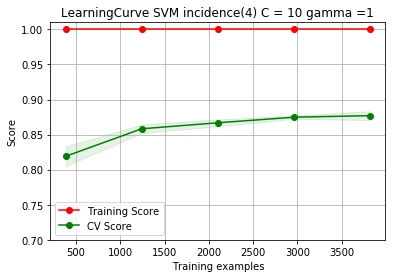

In [40]:
#generates learning curves based on vector and esetimator fed. So get the best estimator parameters, declare an estimator
#here and pass the required data into the plot_learning_curve function
from sklearn.model_selection import ShuffleSplit
title = "LearningCurve SVM incidence(4) C = 10 gamma =1" 
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
estimator = SVC(C=10,gamma=1)
plot_learning_curve(estimator,title,mess_tfidf3,label_i,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals